<a href="https://colab.research.google.com/github/alejandroariaszuluaga/sinfonia/blob/master/reto3_SinfonIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 3: Convocatoria SinfonÍA**

**Autor:** Alejandro Arias

**Código:** 201711999

**Correo de contacto:** a.ariasz@uniandes.edu.co

A continuación se implementan principalmente dos alternativas para resolver el siguiente problema de clasificación binaria:

> Desarrollar un modelo que reciba un vector de características y retorne la etiqueta, indicando si hay o no una persona.

A continuación se importan los datos necesarios, los cuales fueron obtenidos desde el repositorio: https://github.com/carolinahiguera/ConvocatoriaSinfonIAUniandes.git


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28']

xTrain_df = pd.read_csv('/content/drive/My Drive/ConvocatoriaSinfonIAUniandes/reto3/DataTrain.csv', names=cols)
yTrain_df = pd.read_csv('/content/drive/My Drive/ConvocatoriaSinfonIAUniandes/reto3/LabelsTrain.csv', names=['y'])

xTrain, xVal, yTrain, yVal = train_test_split(xTrain_df.values, yTrain_df.values, test_size = 0.2)
yTrain = np.ravel(yTrain)
yVal = np.ravel(yVal)

# Regresión Logística

En primer lugar, se realizó una prueba preliminar aplicando un modelo de regresión logística.

In [3]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(xTrain, yTrain)
clf.score(xVal, yVal)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9047783933518005

# **Redes Neuronales**

Posteriormente, se probaron varias arquitecturas de redes neuronales, tomando un rango desde 2 hasta 200 neuronas por cada capa. Igualmente, se analizó un rango desde 2 hasta 5 capas escondidas.

Se utilizaron los parámetros:

*   Función de activación: ReLu
*   Optimizador: *Adam*


In [4]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)

def red_neuronal(xTrain, yTrain, xVal, yVal, n, capas):
  
  clf = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(n,capas))
  clf.fit(xTrain, yTrain)
  
  pred_val_Y = clf.predict(xVal)
  pred_train_Y = clf.predict(xTrain)
  
  train_ac = accuracy_score(yTrain, pred_train_Y)
  val_ac = accuracy_score(yVal, pred_val_Y)
  return val_ac, train_ac

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


**Red Neuronal 2 Capas**

100%|██████████| 98/98 [18:46<00:00, 11.49s/it]

Precisión a partir de un entrenamiento con:
-> 83 neuronas. Validación: 0.953601108033241


Text(0, 0.5, 'Precisión con datos de validación')

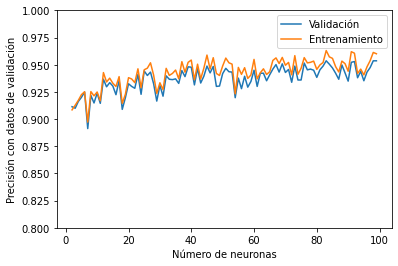

In [5]:
Nmin = 2
Nmax = 100
capas = 2
n_max_ac = 0
max_ac = 0
vector_val_ac = []
vector_train_ac = []
for n in tqdm(range(Nmin,Nmax)):
  val_ac, train_ac = red_neuronal(xTrain, yTrain, xVal, yVal, n, capas)
  
  vector_train_ac.append(train_ac)
  vector_val_ac.append(val_ac)
  if val_ac>max_ac:
    max_ac = val_ac
    n_max_ac = n
    
print("Precisión a partir de un entrenamiento con:")
print("->",n_max_ac,"neuronas. Validación:", max_ac)

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac, label='Validación')
ax.plot(range(Nmin,Nmax), vector_train_ac, label='Entrenamiento')
leg = ax.legend();

plt.ylim(0.8,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

**Red Neuronal 3 Capas**

100%|██████████| 98/98 [17:52<00:00, 10.95s/it]

Precisión a partir de un entrenamiento con:
-> 89 neuronas. Validación: 0.9560249307479224


Text(0, 0.5, 'Precisión con datos de validación')

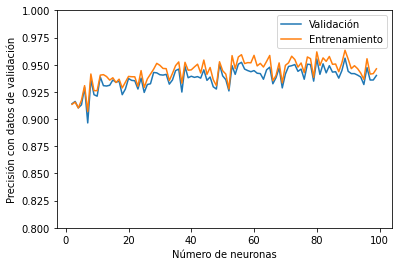

In [6]:
Nmin = 2
Nmax = 100
capas = 3
n_max_ac = 0
max_ac = 0
vector_val_ac = []
vector_train_ac = []
for n in tqdm(range(Nmin,Nmax)):
  val_ac, train_ac = red_neuronal(xTrain, yTrain, xVal, yVal, n, capas)
  
  vector_train_ac.append(train_ac)
  vector_val_ac.append(val_ac)
  if val_ac>max_ac:
    max_ac = val_ac
    n_max_ac = n
    
print("Precisión a partir de un entrenamiento con:")
print("->",n_max_ac,"neuronas. Validación:", max_ac)

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac, label='Validación')
ax.plot(range(Nmin,Nmax), vector_train_ac, label='Entrenamiento')
leg = ax.legend();

plt.ylim(0.8,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

**Red Neuronal 4 Capas**

100%|██████████| 98/98 [17:48<00:00, 10.91s/it]

Precisión a partir de un entrenamiento con:
-> 95 neuronas. Validación: 0.9542936288088643


Text(0, 0.5, 'Precisión con datos de validación')

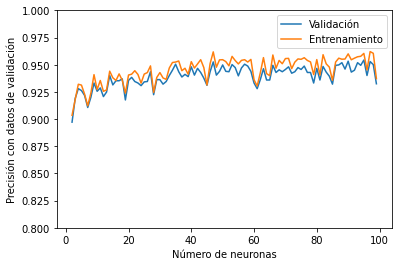

In [7]:
Nmin = 2
Nmax = 100
capas = 4
n_max_ac = 0
max_ac = 0
vector_val_ac = []
vector_train_ac = []
for n in tqdm(range(Nmin,Nmax)):
  val_ac, train_ac = red_neuronal(xTrain, yTrain, xVal, yVal, n, capas)
  
  vector_train_ac.append(train_ac)
  vector_val_ac.append(val_ac)
  if val_ac>max_ac:
    max_ac = val_ac
    n_max_ac = n
    
print("Precisión a partir de un entrenamiento con:")
print("->",n_max_ac,"neuronas. Validación:", max_ac)

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac, label='Validación')
ax.plot(range(Nmin,Nmax), vector_train_ac, label='Entrenamiento')
leg = ax.legend();

plt.ylim(0.8,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

**Red Neuronal 5 Capas**

100%|██████████| 98/98 [18:27<00:00, 11.30s/it]

Precisión a partir de un entrenamiento con:
-> 92 neuronas. Validación: 0.9546398891966759


Text(0, 0.5, 'Precisión con datos de validación')

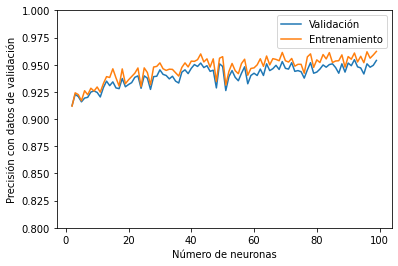

In [8]:
Nmin = 2
Nmax = 100
capas = 5
n_max_ac = 0
max_ac = 0
vector_val_ac = []
vector_train_ac = []
for n in tqdm(range(Nmin,Nmax)):
  val_ac, train_ac = red_neuronal(xTrain, yTrain, xVal, yVal, n, capas)
  
  vector_train_ac.append(train_ac)
  vector_val_ac.append(val_ac)
  if val_ac>max_ac:
    max_ac = val_ac
    n_max_ac = n
    
print("Precisión a partir de un entrenamiento con:")
print("->",n_max_ac,"neuronas. Validación:", max_ac)

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac, label='Validación')
ax.plot(range(Nmin,Nmax), vector_train_ac, label='Entrenamiento')
leg = ax.legend();

plt.ylim(0.8,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

# Support Vector Machine

Finalmente, se analizaron los resultados a partir de un clasificador tipo SVM. Se realizó una principal variación del parámetro de regularización (C), el cual se relaciona de forma inversa a la complejidad del modelo (previniendo *overfitting*).

In [16]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)

def svm(xTrain, yTrain, xVal, yVal, exp_C):
  sv_clf = SVC(C = 10**(exp[exp_C]), kernel = 'rbf', gamma = 'auto')
  sv_clf.fit(xTrain, yTrain)

  pred_trainY = sv_clf.predict(xTrain)
  pred_valY = sv_clf.predict(xVal)
  
  train_ac = accuracy_score(yTrain, pred_trainY)
  val_ac = accuracy_score(yVal, pred_valY)
  return val_ac, train_ac, sv_clf




  0%|          | 0/50 [00:00<?, ?it/s]


  2%|▏         | 1/50 [00:14<11:34, 14.18s/it]


  4%|▍         | 2/50 [00:28<11:18, 14.14s/it]


  6%|▌         | 3/50 [00:41<10:47, 13.78s/it]


  8%|▊         | 4/50 [00:53<10:09, 13.26s/it]


 10%|█         | 5/50 [01:04<09:30, 12.69s/it]


 12%|█▏        | 6/50 [01:15<08:50, 12.05s/it]


 14%|█▍        | 7/50 [01:24<08:09, 11.38s/it]


 16%|█▌        | 8/50 [01:34<07:30, 10.73s/it]


 18%|█▊        | 9/50 [01:42<06:55, 10.15s/it]


 20%|██        | 10/50 [01:51<06:27,  9.68s/it]


 22%|██▏       | 11/50 [01:59<05:59,  9.22s/it]


 24%|██▍       | 12/50 [02:07<05:35,  8.84s/it]


 26%|██▌       | 13/50 [02:15<05:12,  8.43s/it]


 28%|██▊       | 14/50 [02:22<04:49,  8.05s/it]


 30%|███       | 15/50 [02:29<04:28,  7.66s/it]


 32%|███▏      | 16/50 [02:35<04:06,  7.26s/it]


 34%|███▍      | 17/50 [02:41<03:47,  6.89s/it]


 36%|███▌      | 18/50 [02:47<03:28,  6.53s/it]


 38%|███▊      | 19/50 [02:52<03:12,  6.21s/it]


 40%|████      

Precisión a partir de un entrenamiento con:
->Regularización C: 2.387755102040816 . Validación: 0.9674515235457064


Text(0.5, 1.0, 'Entrenamiento de modelo SVM con kernel gaussiano')

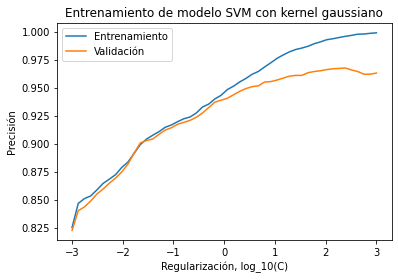

In [17]:
from sklearn.svm import SVC

train_ac = []
val_ac = []
max_val_ac = 0
max_val_ac_C = 0
C_min = -3
C_max = 3

exp = np.linspace(C_min, C_max, 50)

for i in tqdm(range(len(exp))):
  prec_val, prec_train, sv_clf = svm(xTrain, yTrain, xVal, yVal, i)

  train_ac.append(prec_train)
  val_ac.append(prec_val)
  if prec_val > max_val_ac:
    max_val_ac = prec_val
    sv_best_clf = sv_clf
    max_val_ac_C = exp[i]

print("Precisión a partir de un entrenamiento con:")
print("->Regularización C:",max_val_ac_C,". Validación:", max_val_ac)

fig, ax = plt.subplots()
ax.plot(exp, train_ac, label='Entrenamiento')
ax.plot(exp, val_ac, label='Validación')
ax.legend()
plt.xlabel("Regularización, log_10(C)")
plt.ylabel("Precisión")
plt.title("Entrenamiento de modelo SVM con kernel gaussiano")

# Creación de Archivo con Etiquetas de Prueba



In [25]:
C_min = -3
C_max = 3

exp = np.linspace(C_min, C_max, 50)

sv_clf = SVC(C = 10**(2.387755), kernel = 'rbf', gamma = 'auto')
sv_clf.fit(xTrain, yTrain)

pred_trainY = sv_clf.predict(xTrain)
pred_valY = sv_clf.predict(xVal)
  
train_ac = accuracy_score(yTrain, pred_trainY)
val_ac = accuracy_score(yVal, pred_valY)

print(val_ac)

xTest = pd.read_csv('/content/drive/My Drive/ConvocatoriaSinfonIAUniandes/reto3/DataTest.csv', names=cols)

predY = sv_clf.predict(xTest)
pd.DataFrame(predY).to_csv("reto3_201711999.csv", header=None, index=None)

0.9691828254847645
